In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read log files
df1 = pd.read_csv("logs/time1.txt", header=None, names=['submission_id', 'time1'])
df2 = pd.read_csv("logs/time2.txt", header=None, names=['submission_id', 'time2'])  # không dùng nhưng có thể giữ nếu cần
df3 = pd.read_csv("logs/time3.txt", header=None, names=['submission_id', 'time3'])
df4 = pd.read_csv("logs/time4.txt", header=None, names=['submission_id', 'time4'])

# Merge data by submission_id
data = df1.merge(df3, on='submission_id') \
          .merge(df4, on='submission_id')

# Calculate time metrics
data['finish_all_tests_time'] = data['time3']
data['total_time_user_waits'] = (data['time4'] - data['time1']) / 3

# Remove negative values (if any)
data = data.clip(lower=0)

# Sort by submission_id
data = data.sort_values(by='submission_id').reset_index(drop=True)

# Tạo cột thứ tự thay cho submission_id
data['order'] = range(1, len(data) + 1)

# Plot line chart
plt.figure(figsize=(12, 6))
# plt.plot(data['order'], data['finish_all_tests_time'], label='Finish All Tests Time', color='blue', linewidth=2)
plt.plot(data['order'], data['total_time_user_waits'], label='Average User Waiting Time', color='red', linewidth=2)

plt.title("Submission Processing Time")
plt.xlabel("Submission Order")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Show statistics
print("\nDescriptive statistics of processing time:")
print(data[['finish_all_tests_time', 'total_time_user_waits']].describe())

# Vẽ biểu đồ tròn thể hiện 100% thành công
plt.figure(figsize=(4, 4))
labels = ['Success']
sizes = [100]
colors = ['green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
plt.title("Submission Status")
plt.tight_layout()
plt.show()


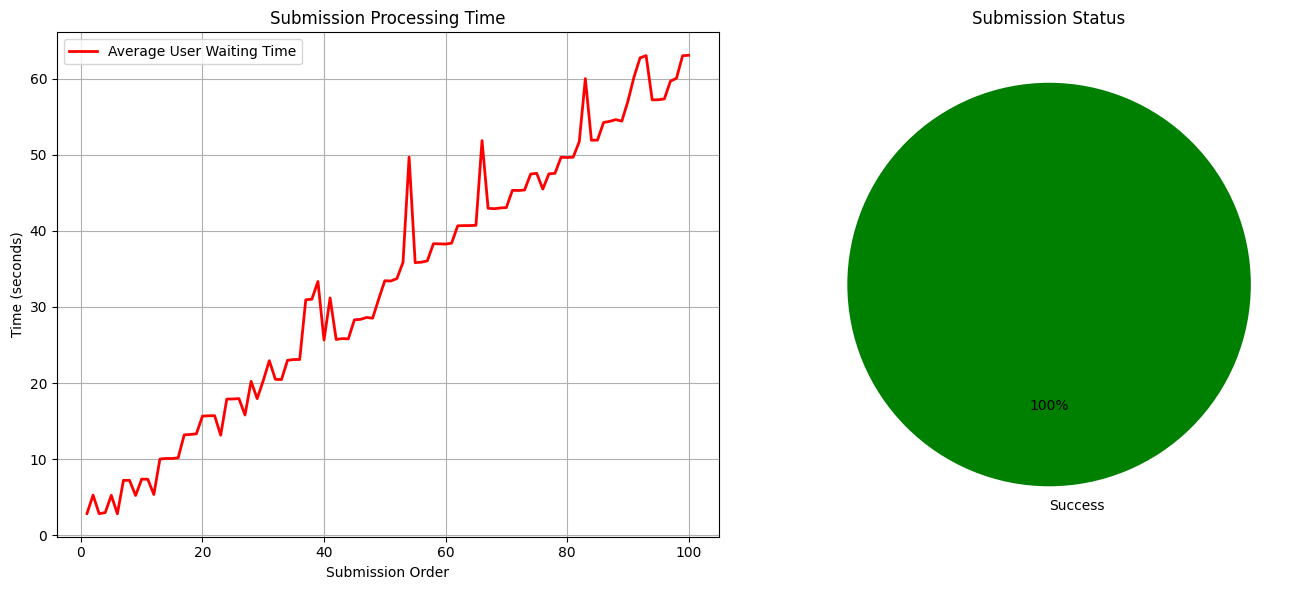


Descriptive statistics of processing time:
       finish_all_tests_time  total_time_user_waits
count             100.000000             100.000000
mean                1.047577              32.861665
std                 0.131345              17.965339
min                 0.829986               2.803963
25%                 0.951381              17.898459
50%                 1.022764              33.432099
75%                 1.127991              47.570969
max                 1.506371              63.100126


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read and process data (keep your existing code)
df1 = pd.read_csv("logs/time1.txt", header=None, names=['submission_id', 'time1'])
df3 = pd.read_csv("logs/time3.txt", header=None, names=['submission_id', 'time3'])
df4 = pd.read_csv("logs/time4.txt", header=None, names=['submission_id', 'time4'])

data = df1.merge(df3, on='submission_id').merge(df4, on='submission_id')
data['finish_all_tests_time'] = data['time3']
data['total_time_user_waits'] = (data['time4'] - data['time1']) / 2
data = data.clip(lower=0).sort_values(by='submission_id').reset_index(drop=True)
data['order'] = range(1, len(data) + 1)

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Left subplot - Line chart
ax1 = plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
ax1.plot(data['order'], data['total_time_user_waits'], 
         label='Average User Waiting Time', color='red', linewidth=2)
ax1.set_title("Submission Processing Time")
ax1.set_xlabel("Submission Order")
ax1.set_ylabel("Time (seconds)")
ax1.legend()
ax1.grid(True)

# Right subplot - Pie chart
ax2 = plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
labels = ['Success']
sizes = [100]
colors = ['green']
ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
ax2.set_title("Submission Status")

# Adjust layout
plt.tight_layout()
plt.show()

# Show statistics (keep your existing code)
print("\nDescriptive statistics of processing time:")
print(data[['finish_all_tests_time', 'total_time_user_waits']].describe())